Grace Watts

<a name="problem_embedded"></a>

##### Problem embedded

Though the error estimate is for the embedded
fourth-order Runge-Kutta method, the fifth-order method can be used in
practice for calculating the solution, the assumption being the
fifth-order method should be at least as accurate as the fourth-order
method. In the demo below, compare solutions of the test problem
[eq:test2](#eq:test2]) 

<div id="eq:test2"><b>eq:test2</b></div>
$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1$$

generated by the fifth-order method with solutions generated by the
standard fourth-order Runge-Kutta method. Which method
is more accurate? Again, determine how the error decreases as you halve
the stepsizes. 

******************************
context imported. Front of path:
/home/gwatts/repos/numeric_2024
back of path: /home/gwatts/miniforge3/envs/numeric_2024/lib/python3.12/site-packages
******************************

through /home/gwatts/repos/numeric_2024/notebooks/lab4/context.py


Text(0.5, 0, 'time (seconds)')

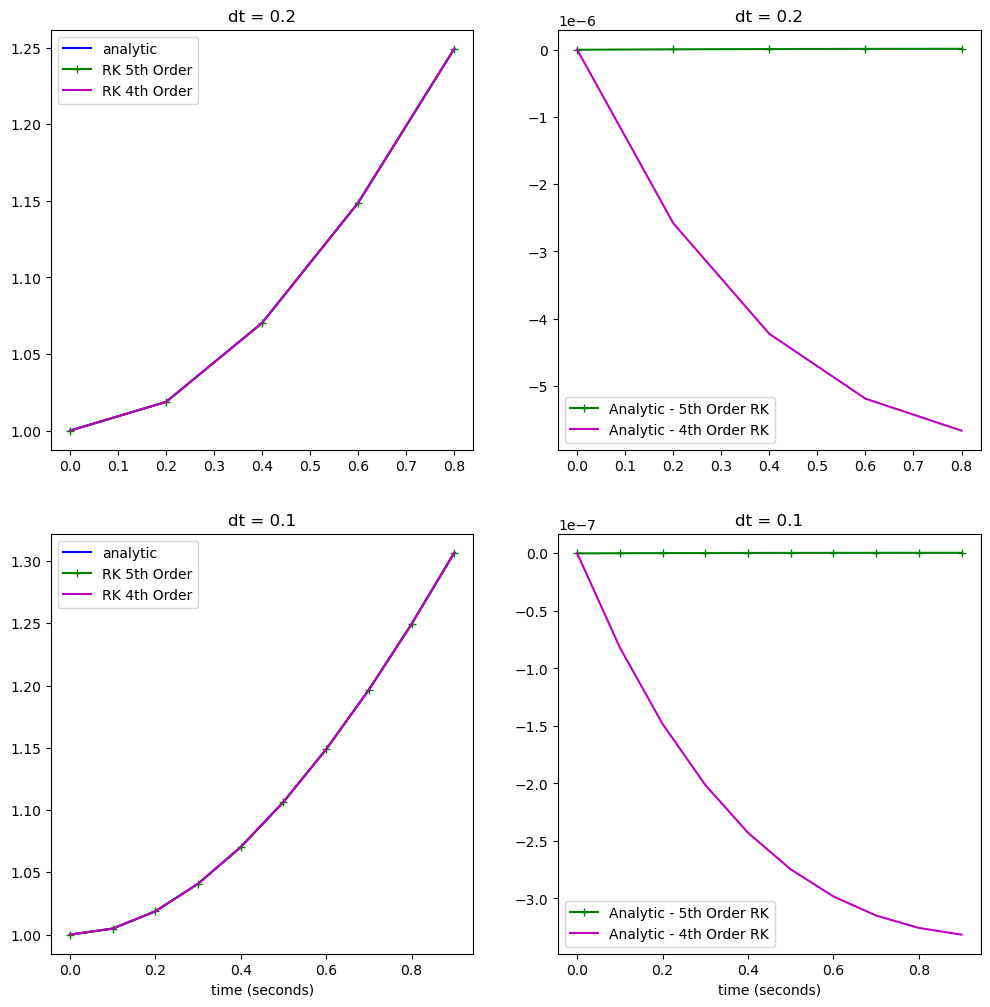

In [1]:
import context
from collections import namedtuple
from numlabs.lab4.lab4_functions import rk4ODEinter41,rkckODEinter41
import numpy as np
from matplotlib import pyplot as plt

# initial values
initialVals={
    'yinitial': 1,
    't_beg': 0.,
    't_end': 1.,
    'dt': 0.2,
    'c1': -1.,
    'c2': 1.,
    'c3': 1.
}
initialvals = namedtuple('initialvals', 'yinitial t_beg t_end dt c1 c2 c3')
coeff = initialvals(**initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)

yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)

# use RK4 and RK5 on first dt
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew
    
analytic=timeVec + np.exp(-timeVec)

# plot RK4, RK5, and the analytical solution 
fig1,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12))
l1=ax1.plot(timeVec,analytic,'b-',label='analytic')
l2=ax1.plot(timeVec,yrkck,'g+-',label='RK 5th Order')
l3=ax1.plot(timeVec,yrk,'m-',label='RK 4th Order')
ax1.legend(loc='best')
ax1.set_title('dt = '+str(coeff.dt));

# plot analytic - RK4 and analytic - RK4 to see which one has a smaller error
l2=ax2.plot(timeVec,analytic - yrkck,'g+-',label='Analytic - 5th Order RK')
l3=ax2.plot(timeVec,analytic - yrk,'m-',label='Analytic - 4th Order RK')
ax2.legend(loc='best')
ax2.set_title('dt = ' + str(coeff.dt));

#
#
# Repeat the steps above but with half the step size
initialVals={
    'yinitial': 1,
    't_beg': 0.,
    't_end': 1.,
    'dt': 0.1,
    'c1': -1.,
    'c2': 1.,
    'c3': 1.
}
initialvals = namedtuple('initialvals', 'yinitial t_beg t_end dt c1 c2 c3')
coeff = initialvals(**initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)

yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)

# step size is now half the previous
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew
    
analytic=timeVec + np.exp(-timeVec)

l1=ax3.plot(timeVec,analytic,'b-',label='analytic')
ax3.set_xlabel('time (seconds)')
l2=ax3.plot(timeVec,yrkck,'g+-',label='RK 5th Order')
l3=ax3.plot(timeVec,yrk,'m-',label='RK 4th Order')
ax3.legend(loc='best')
ax3.set_title('dt = '+str(coeff.dt));

l2=ax4.plot(timeVec,analytic - yrkck,'g+-',label='Analytic - 5th Order RK')
l3=ax4.plot(timeVec,analytic - yrk,'m-',label='Analytic - 4th Order RK')
ax4.legend(loc='best')
ax4.set_title('dt = ' + str(coeff.dt))
ax4.set_xlabel('time (seconds)')

The plots in column 1 in the figure above show the analytical solution and the RK4 and RK5 solutions. From these we can see that both RK methods are very accurate. If we increase t_end and dt (e.g. dt = 5, t_end = 40), we can see that the RK methods do eventually deviate from the true solution but halving the step size decreases the error.

The plots in column 2 show the difference between the analytical solution and each of the RK methods. In both plots we can see that the RK5 methd is more accurate but by very little, note the y-axis scales! And again, halving the time step reduced the error in RK4 from a e-6 scale to e-7.

<a name="problem_coding_B"></a>

##### Problem Coding B

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. 
    
    $$f(y,t) = t - y  + 1.0$$ 
    
    Choose two sets
    of initial conditions and determine if 
    there is any difference between the two methods when applied to
    either problem. Should there be? Explain by analyzing the steps
    that each method is taking.
    
2. Add your answer as new cells to the problem A notebook

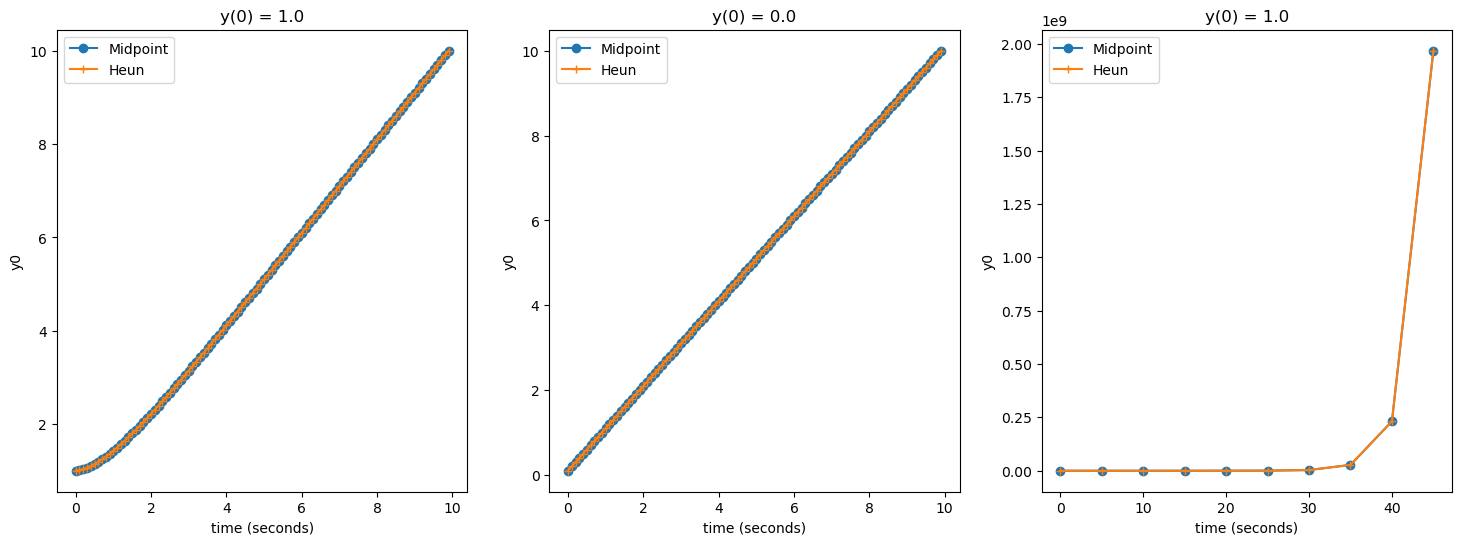

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import context
import json
from collections import namedtuple
from numlabs.lab4.lab4_functions import derivsinter41


def derivsinter41(coeff, y, theTime):
    f = coeff.c1*y + coeff.c2*theTime + coeff.c3
    return f

def midpointinter41(coeff, y,theTime):
    midy=y + 0.5 * coeff.dt * derivsinter41(coeff,y,theTime)
    y = y + coeff.dt*derivsinter41(coeff,midy,theTime+0.5*coeff.dt)
    return y

def heun4(coeff, y, theTime):
    k1 = coeff.dt*derivsinter41(coeff,y,theTime)
    k2 = coeff.dt*derivsinter41(coeff, y + (2.0/3.0)*k1, theTime  + coeff.dt*(2.0/3.0))
    y_heun = y + (1.0/4.0)*k1 + (3.0/4.0)*k2
    return y_heun


#
#
#
#
#
initialVals = {
    'yinitial': 1.,
    't_beg': 0.,
    't_end': 10.,
    'dt': 0.1,
    'c1': -1.,
    'c2': 1.,
    'c3': 1.
}

initvals = namedtuple('initvals','dt c1 c2 c3 t_beg t_end yinitial')
coeff = initvals(**initialVals)

ym=coeff.yinitial
yh=coeff.yinitial
#ya=coeff.yinitial

time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time)
    
saveMids=np.empty([nsteps],np.float64)
saveHeuns=np.empty([nsteps],np.float64)
#saveAnalyt=np.empty([nsteps],np.float64)

for i in range(nsteps):
    ym = midpointinter41(coeff, ym, time[i])
    saveMids[i] = ym
    yh = heun4(coeff,yh, time[i])
    saveHeuns[i] = yh
    #ya=time[i] + np.exp(-time[i])
    #saveAnalyt[i]=ya

fig2,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))
ax1.plot(time,saveMids, 'o-', label='Midpoint')
ax1.plot(time,saveHeuns, '+-', label='Heun')
#ax1.plot(time,saveAnalyt, '-', label='Analytical')
ax1.set_title('y(0) = ' + str(coeff.yinitial))
ax1.set_xlabel('time (seconds)')
ax1.set_ylabel('y0');
ax1.legend()


#
#
#
#
#repeat with new initial condition
initialVals = {
    'yinitial': 0.,
    't_beg': 0.,
    't_end': 10.,
    'dt': 0.1,
    'c1': -1.,
    'c2': 1.,
    'c3': 1.
}

initvals = namedtuple('initvals','dt c1 c2 c3 t_beg t_end yinitial')
coeff = initvals(**initialVals)

ym=coeff.yinitial
yh=coeff.yinitial
#ya=coeff.yinitial

time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time)
    
saveMids=np.empty([nsteps],np.float64)
saveHeuns=np.empty([nsteps],np.float64)
#saveAnalyt=np.empty([nsteps],np.float64)

for i in range(nsteps):
    ym = midpointinter41(coeff, ym, time[i])
    saveMids[i] = ym
    yh = heun4(coeff,yh, time[i])
    saveHeuns[i] = yh
    #ya=time[i] + np.exp(-time[i])
    #saveAnalyt[i]=ya


ax2.plot(time,saveMids, 'o-', label='Midpoint')
ax2.plot(time,saveHeuns, '+-', label='Heun')
#ax2.plot(time,saveAnalyt, '-', label='Analytical')
ax2.set_title('y(0) = ' + str(coeff.yinitial))
ax2.set_xlabel('time (seconds)')
ax2.set_ylabel('y0');
ax2.legend()


#
#
#
#
#repeat with new initial condition
initialVals = {
    'yinitial': 1.,
    't_beg': 0.,
    't_end': 50.,
    'dt': 5.,
    'c1': -1.,
    'c2': 1.,
    'c3': 1.
}

initvals = namedtuple('initvals','dt c1 c2 c3 t_beg t_end yinitial')
coeff = initvals(**initialVals)

ym=coeff.yinitial
yh=coeff.yinitial
#ya=coeff.yinitial

time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time)
    
saveMids=np.empty([nsteps],np.float64)
saveHeuns=np.empty([nsteps],np.float64)
#saveAnalyt=np.empty([nsteps],np.float64)

for i in range(nsteps):
    ym = midpointinter41(coeff, ym, time[i])
    saveMids[i] = ym
    yh = heun4(coeff,yh, time[i])
    saveHeuns[i] = yh
    #ya=time[i] + np.exp(-time[i])
    #saveAnalyt[i]=ya

ax3.plot(time,saveMids, 'o-', label='Midpoint')
ax3.plot(time,saveHeuns, '+-', label='Heun')
#ax3.plot(time,saveAnalyt, '-', label='Analytical')
ax3.set_title('y(0) = ' + str(coeff.yinitial))
ax3.set_xlabel('time (seconds)')
ax3.set_ylabel('y0');
ax3.legend()

Both methods give the same accuracy for the various y(0) shown in the figure above. In the third figure with y(0)=3, I've also increased tend and dt to see how that would effect the two methods. Changing the step size has changed the shape of the curve but by the same amount for both methods.

The Heun method averages the slope at an intermediate step and t1 to calculate the slope at the whole step. This is similar to the midpoint in that it also takes and intermediate step (a half step) first to calculate the slope at a whole step so I would expect the midpoint and Heun method to have similar errors.

<a name="problem_coding_C"></a>

##### Problem Coding C

1.  Solve the Newtonian cooling equation of lab 1 by any of the above
    methods. 

2.  Add cells that do this and also generate some plots, showing your along with the parameter values and
    initial conditions.

#### *Example One*


> Consider a small rock, surrounded by air or water,
which gains or loses heat only by conduction with its surroundings
(there are no radiation effects). If the rock is small enough, then we
can ignore the effects of diffusion of heat within the rock, and
consider only the flow of heat through its surface, where the rock
interacts with the surrounding medium.

> It is well known from experimental observations that the rate at which
the temperature of the rock changes is proportional to the difference
between the rock’s surface temperature, $T(t),$ and the *ambient
temperature*, $T_a$ (the ambient temperature is simply the temperature
of the surrounding material, be it air, water, …). This relationship is
expressed by the following ordinary differential equation
<div id='lab1:eq:conduction1d'>
(Conduction 1d)
$$%    \textcolor[named]{Red}{\frac{dT}{dt}} = -\lambda \,
%    \textcolor[named]{Blue}{(T-T_a)} .
    \underbrace{\frac{dT}{dt}}_{\begin{array}{c} 
                                \mbox{rate of change}\\
                                \mbox{of temperature}
                                \end{array}}
    = -\lambda \underbrace{(T-T_a)}_{\begin{array}{c} 
                                \mbox{temperature}\\
                                \mbox{difference}
                                \end{array}} .$$
</div>
    
>and is commonly known as *Newton’s
Law of Cooling*. (The parameter $\lambda$ is defined to be
$\lambda = \mu A/cM$, where $A$ is the surface area of the rock, $M$ is
its mass, $\mu$ its thermal conductivity, and $c$ its specific heat.)

If we assume that $\lambda$ is a constant, then the solution to this
equation is given by 

<div id='lab1:eq:conduction-soln'>
(Conduction solution)
$$T(t) = T_a + (T(0)-T_a)e^{-\lambda t},$$
</div>

where $T(0)$ is the initial temperature.

In order to obtain realistic value of the parameter $\lambda$, let our
“small” rock be composed of granite, with mass of $1\;gram$, which
corresponds to a $\lambda \approx 10^{-5}\;sec^{-1}$.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import context
import json
import math
from collections import namedtuple

def heat(theTemp,Ta,theLambda):
    out=-theLambda*(theTemp-Ta)
    return out


def midpoint(npts,tend,To,Ta,theLambda):
    theTemp=np.empty([npts,],np.float64)
    theTemp[0]=To
    dt=tend/npts
    theTime=np.empty_like(theTemp)

    theTime[0]=0
    theTime[1]=dt
    
    # midpoint calculates from the half step
    tempHalf = To + 0.5*((To + heat(To,Ta,theLambda)*dt)-To)
    theTemp[1] = To + heat(tempHalf,Ta,theLambda)*dt 
    for timeStep in np.arange(2,npts):
        theTime[timeStep]=theTime[timeStep-1] + dt
        theTemp[timeStep]=theTemp[timeStep-2] + \
            heat(theTemp[timeStep-1],Ta, theLambda)*2.0*dt
    return (theTime,theTemp)


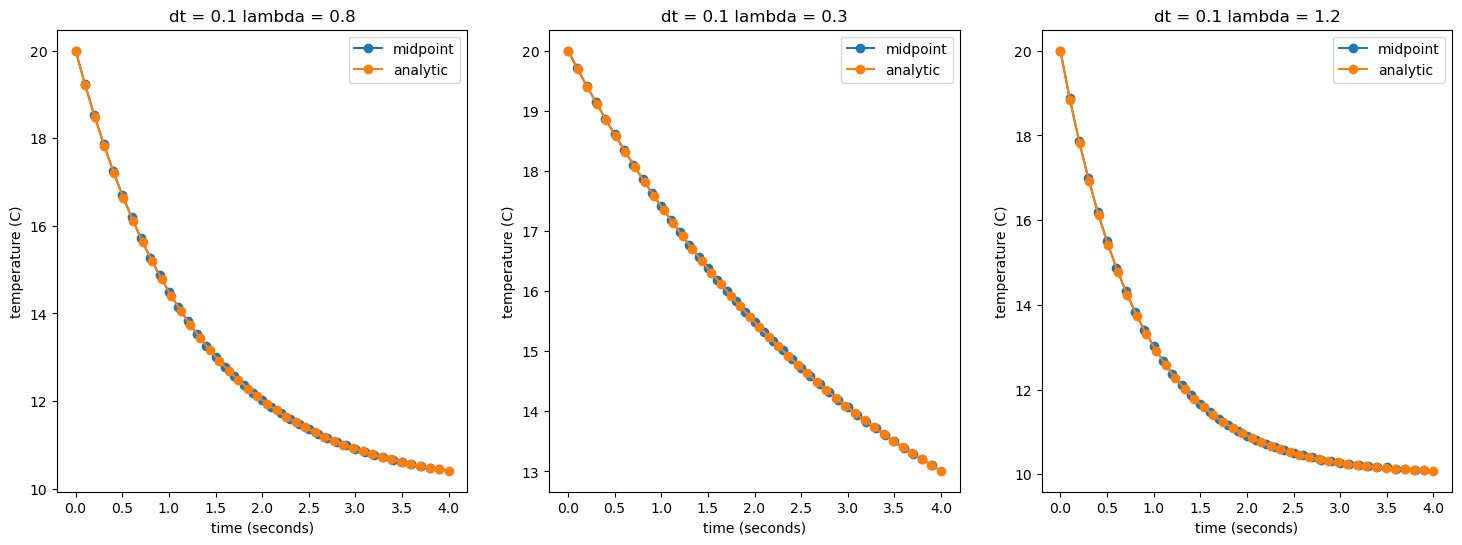

In [4]:
initialVals = {
    'yinitial': 1.,
    'tbeg': 0.,
    'tend': 4.,
    'Ta': 10., # start at 30 degC, air temp of 20 deg C
    'To': 20.,
    'theLambda': 0.8 #units have to be per minute if time in seconds
}

initialvals = namedtuple('initialvals', 'Ta To theLambda tbeg tend yinitial')
coeffs = initialvals(**initialVals)
npts=40
dt = coeffs.tend/npts

exactTime=np.linspace(0,coeffs.tend,npts)
exactTemp=coeffs.Ta + (coeffs.To-coeffs.Ta)*np.exp(-coeffs.theLambda*exactTime)

time=np.arange(coeffs.tbeg,coeffs.tend,npts)

mid={}
mid=midpoint(npts, coeffs.tend, coeffs.To, coeffs.Ta, coeffs.theLambda)

fig3,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))
ax1.plot(mid[0],mid[1],'o-', label='midpoint')
ax1.plot(exactTime,exactTemp, 'o-', label='analytic')
ax1.set_xlabel('time (seconds)')
ax1.set_ylabel('temperature (C)');
ax1.set_title('dt = ' + str(dt) + ' lambda = ' + str(coeffs.theLambda))
ax1.legend()


#
#
#
#
initialVals = {
    'yinitial': 1.,
    'tbeg': 0.,
    'tend': 4.,
    'Ta': 10., # start at 30 degC, air temp of 20 deg C
    'To': 20.,
    'theLambda': 0.3 #units have to be per minute if time in seconds
}

initialvals = namedtuple('initialvals', 'Ta To theLambda tbeg tend yinitial')
coeffs = initialvals(**initialVals)

exactTime=np.linspace(0,coeffs.tend,npts)
exactTemp=coeffs.Ta + (coeffs.To-coeffs.Ta)*np.exp(-coeffs.theLambda*exactTime)

mid={}
mid=midpoint(npts, coeffs.tend, coeffs.To, coeffs.Ta, coeffs.theLambda)

ax2.plot(mid[0],mid[1],'o-', label='midpoint')
ax2.plot(exactTime,exactTemp, 'o-', label='analytic')
ax2.set_xlabel('time (seconds)')
ax2.set_ylabel('temperature (C)');
ax2.set_title('dt = ' + str(dt) + ' lambda = ' + str(coeffs.theLambda))
ax2.legend()


#
#
#
#
initialVals = {
    'yinitial': 1.,
    'tbeg': 0.,
    'tend': 4.,
    'Ta': 10., # start at 30 degC, air temp of 20 deg C
    'To': 20.,
    'theLambda': 1.2 #units have to be per minute if time in seconds
}

initialvals = namedtuple('initialvals', 'Ta To theLambda tbeg tend yinitial')
coeffs = initialvals(**initialVals)

exactTime=np.linspace(0,coeffs.tend,npts)
exactTemp=coeffs.Ta + (coeffs.To-coeffs.Ta)*np.exp(-coeffs.theLambda*exactTime)

mid={}
mid=midpoint(npts, coeffs.tend, coeffs.To, coeffs.Ta, coeffs.theLambda)

ax3.plot(mid[0],mid[1],'o-', label='midpoint')
ax3.plot(exactTime,exactTemp, 'o-', label='analytic')
ax3.set_xlabel('time (seconds)')
ax3.set_ylabel('temperature (C)');
ax3.set_title('dt = ' + str(dt) + ' lambda = ' + str(coeffs.theLambda))
ax3.legend()

The figure above shows the solution to the heat equation with various lambdas. The smaller the lambda, the more shallow the curve...or the curve looks more linear compared to the decaying exponential of the orginal lambda (0.8) and the larger lambda (1.2). Lambda is the thermal conductivity, so a smaller lambda means that heat doesn't permeate through the rock as quickly so it is a slower cooling process, or vice versa for larger lambda, which is what is shown in these plots. 

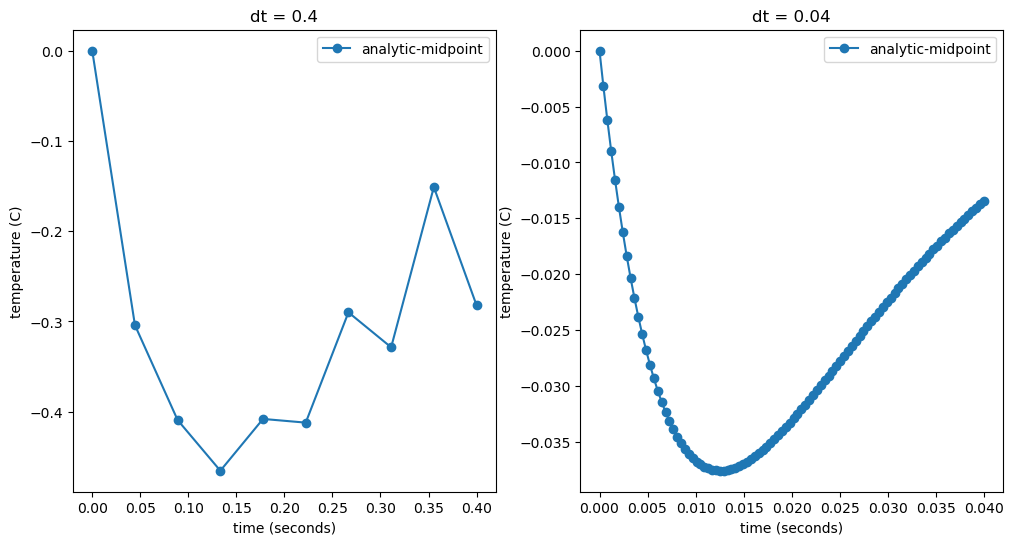

In [5]:
initialVals = {
    'yinitial': 1.,
    'tbeg': 0.,
    'tend': 4.,
    'Ta': 10., # start at 30 degC, air temp of 20 deg C
    'To': 20.,
    'theLambda': 0.8 #units have to be per minute if time in seconds
}

initialvals = namedtuple('initialvals', 'Ta To theLambda tbeg tend yinitial')
coeffs = initialvals(**initialVals)
npts=10
dt = coeffs.tend/npts

exactTime=np.linspace(0,coeffs.tend,npts)
exactTemp=coeffs.Ta + (coeffs.To-coeffs.Ta)*np.exp(-coeffs.theLambda*exactTime)

time=np.arange(coeffs.tbeg,coeffs.tend,npts)

mid={}
mid=midpoint(npts, coeffs.tend, coeffs.To, coeffs.Ta, coeffs.theLambda)


fig4,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
#ax1.plot(mid[0],mid[1],'o-', label='midpoint')
ax1.plot(exactTime-mid[0],exactTemp-mid[1], 'o-', label='analytic-midpoint')
#ax1.plot(time, T + (coeffs.Ta-T[0])*math.exp(-coeffs.gm*time), label='analytic')
ax1.set_xlabel('time (seconds)')
ax1.set_ylabel('temperature (C)');
ax1.set_title('dt = ' + str(dt))
ax1.legend()

#
#
#
#
npts=100
dt = coeffs.tend/npts

exactTime=np.linspace(0,coeffs.tend,npts)
exactTemp=coeffs.Ta + (coeffs.To-coeffs.Ta)*np.exp(-coeffs.theLambda*exactTime)

time=np.arange(coeffs.tbeg,coeffs.tend,npts)

mid={}
mid=midpoint(npts, coeffs.tend, coeffs.To, coeffs.Ta, coeffs.theLambda)

#ax2.plot(mid[0],mid[1],'o-', label='midpoint')
ax2.plot(exactTime-mid[0],exactTemp-mid[1], 'o-', label='analytic-midpoint')
ax2.set_xlabel('time (seconds)')
ax2.set_ylabel('temperature (C)');
ax2.set_title('dt = ' + str(dt))
ax2.legend()

Here, I have played around with the step size to show again how smaller steps sizes decreases the method error.